In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
plt.style.use("seaborn-darkgrid")
np.set_printoptions(precision=2)
pd.set_option("display.precision", 2)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_52592/423997370.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


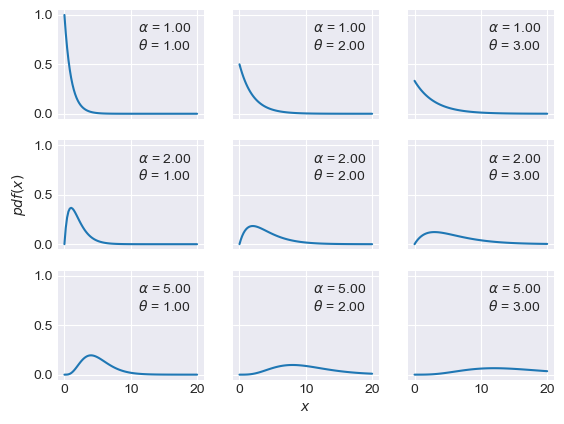

In [2]:
rates = [1, 2, 5]
scales = [1, 2, 3]

x = np.linspace(0, 20, 100)
f, ax = plt.subplots(len(rates), len(scales), sharex=True, sharey=True)
for i in range(len(rates)):
    for j in range(len(scales)):
        rate = rates[i]
        scale = scales[j]
        rv = stats.gamma(a=rate, scale=scale)
        ax[i,j].plot(x, rv.pdf(x))
        ax[i,j].plot(0, 0, label=f"$\\alpha$ = {rate:3.2f}\n$\\theta$ = {scale:3.2f}", alpha=0)
        ax[i,j].legend()

ax[2,1].set_xlabel("$x$")
ax[1,0].set_ylabel("$pdf(x)$")
plt.savefig("img401.png")

### 人口データの生成
- 線形回帰を行うデータを作る

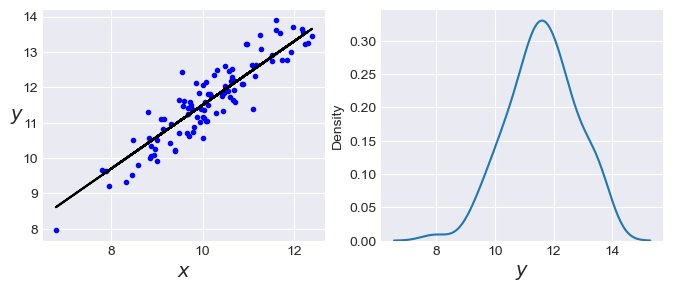

In [3]:
np.random.seed(314)
N = 100
alfa_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alfa_real + beta_real * x
y = y_real + eps_real

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.plot(x, y_real, "k")
plt.subplot(1,2,2)
sns.kdeplot(y)
plt.xlabel("$y$", fontsize=14)
plt.savefig("img403.png")

In [4]:
with pm.Model() as model:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=1)
    epsilon = pm.HalfCauchy("epsilon", 5)

    mu = pm.Deterministic("mu", alpha + beta * x)
    y_pred = pm.Normal("y_pred", mu=mu, sigma=epsilon, observed=y)
    # y_pred = pm.Normal("y_pred", mu=alpha+beta*x, sigma=epsilon, observed=y

    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(draws=11000, step=step, start=start, 
                      tune=1000, chains=1,
                      return_inferencedata=False)

/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_52592/1394986822.py:12: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  trace = pm.sample(draws=11000, step=step, start=start,
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]


Sampling 1 chain for 1_000 tune and 11_000 draw iterations (1_000 + 11_000 draws total) took 1 seconds.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/base.py:220: UserWarning: More chains (11000) than draws (3). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
Only one chain was sampled, this makes it impossible to run some convergence checks


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
arviz - WARNING - Shape validation failed: input_shape: (1, 11000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.72,0.38,0.96,2.38,9.30e-02,6.70e-02,18.0,27.0,NaN
beta,0.98,0.04,0.91,1.05,9.00e-03,7.00e-03,18.0,29.0,NaN
epsilon,0.47,0.03,0.41,0.54,1.00e-03,1.00e-03,1418.0,1299.0,NaN
mu[0],11.66,0.05,11.57,11.75,1.00e-03,1.00e-03,3080.0,2550.0,NaN
mu[1],9.98,0.08,9.84,10.13,1.50e-02,1.10e-02,25.0,45.0,NaN
...,...,...,...,...,...,...,...,...,...
mu[95],11.06,0.05,10.96,11.16,5.00e-03,3.00e-03,113.0,1132.0,NaN
mu[96],13.13,0.07,12.99,13.27,1.40e-02,1.00e-02,29.0,74.0,NaN
mu[97],9.41,0.09,9.22,9.58,2.10e-02,1.50e-02,21.0,34.0,NaN
mu[98],12.16,0.05,12.06,12.26,5.00e-03,3.00e-03,129.0,1555.0,NaN


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/base.py:220: UserWarning: More chains (11000) than draws (3). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


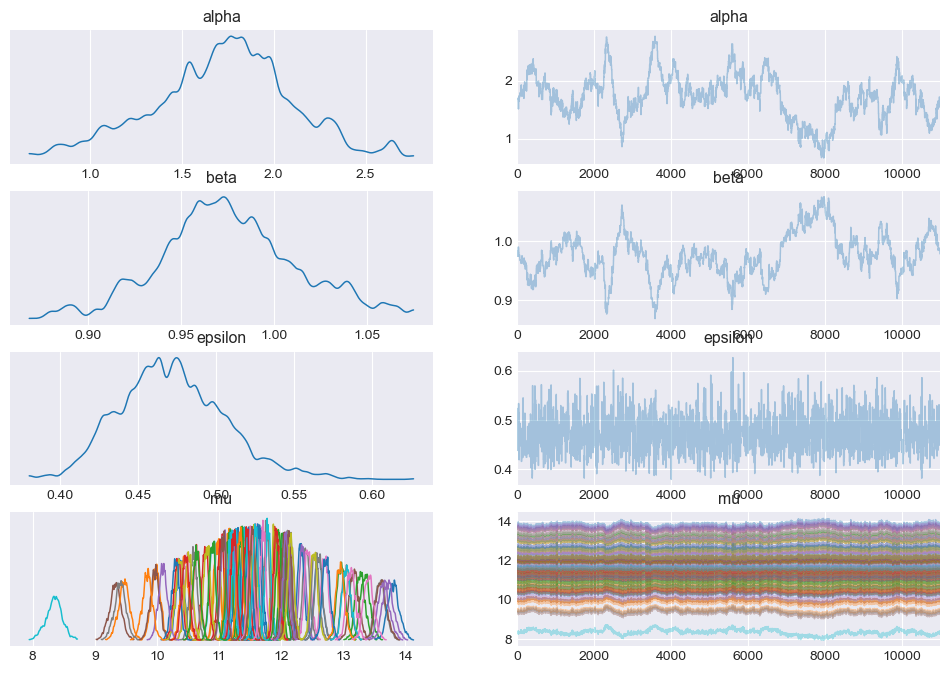

In [5]:
df = az.summary(trace)
display(df)

az.plot_trace(trace)
plt.savefig("img404.png")


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/base.py:220: UserWarning: More chains (11000) than draws (3). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


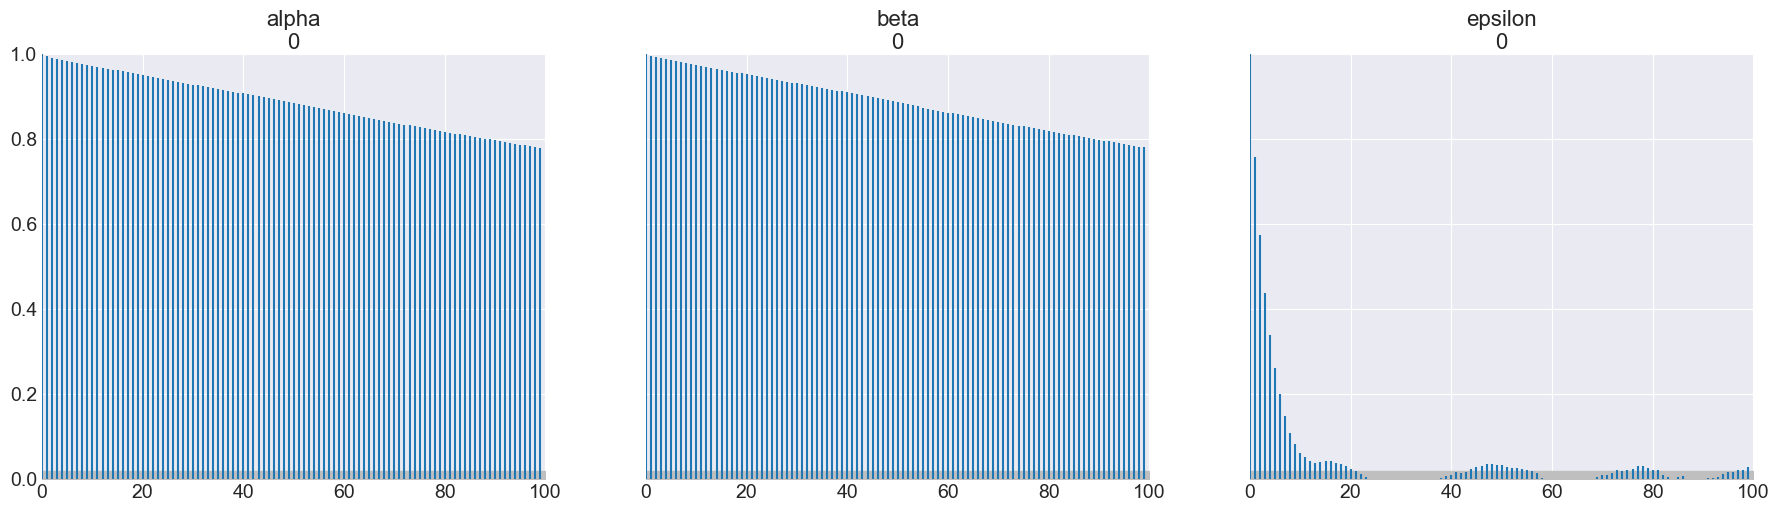

In [6]:
varnames = ["alpha", "beta", "epsilon"]
pm.plot_autocorr(trace, varnames)
plt.ylim([0, 1])
plt.savefig("img405.png")

### パラメータ$\alpha$と$\beta$の事後分布のKDEを出力する
- 上で見た自己相関は、線形回帰という仮定によって$\alpha$と$\beta$の間に相関が生まれたことの結果であったことを見る
    * →対角線のように細い線になっていることがわかる。MHサンプラーにとっては今後問題になる。提案値がほとんど外れてしまう。

/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


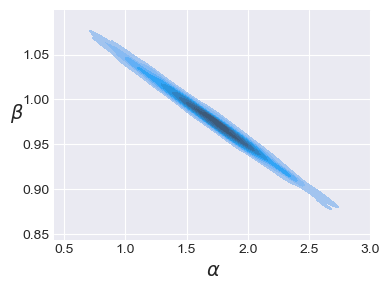

In [7]:
plt.figure(figsize=(4,3))
sns.kdeplot(x=trace["alpha"][1000:], 
            y=trace["beta"][1000:],
            linewidth=1,
            fill=True,
            )
plt.xlabel(r"$\alpha$", fontsize=14)
plt.ylabel(r"$\beta$", fontsize=14, rotation=0)
plt.tight_layout()
plt.show()

## 4.1.4 事後分布の解釈と視覚化

alpha_m=1.72135014102181, beta_m=0.9757476496669587


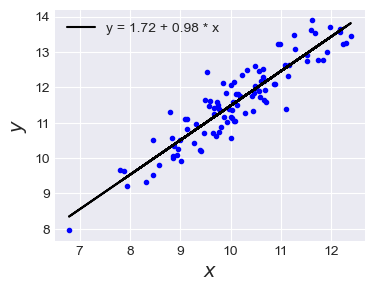

In [8]:
plt.figure(figsize=(4,3))
plt.plot(x, y, "b.")
alpha_m = trace["alpha"].mean()
beta_m = trace["beta"].mean()
print(f"{alpha_m=}, {beta_m=}")
plt.plot(x, alpha_m + beta_m * x, 
         c="k", 
         label=f"y = {alpha_m:.2f} + {beta_m:.2f} * x"
         )
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(loc=2, fontsize=10)
plt.savefig("img407.png")

### 平均$\alpha$と平均$\beta$による回帰直線の不確実性を示す
- 不確実性は中心付近で小さくなるが、１点に集中するわけではない！
- 事後分布は、データの平均値を正確に通るわけではない直線とうまく適合している。

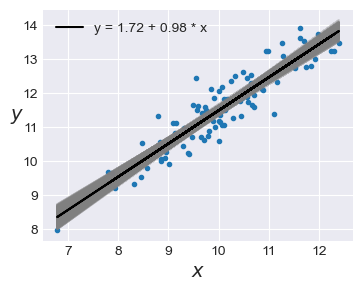

In [9]:
plt.figure(figsize=(4,3))
plt.plot(x, y, "C0.")
idx = range(0, len(trace["alpha"]), 10)
plt.plot(x, trace["alpha"][idx] + trace["beta"][idx] * x[:,np.newaxis], 
         c="gray", alpha=0.3)
plt.plot(x, alpha_m + beta_m * x, 
         c="k", 
         label=f"y = {alpha_m:.2f} + {beta_m:.2f} * x"
         )
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.legend(loc=2, fontsize=10)
plt.savefig("img408.png")

In [10]:
ppc = pm.sample_posterior_predictive(trace, samples=2000, model=model)

/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_52592/2254439213.py:18: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  ci_95 = az.hdi(ppc['y_pred'], hdi_prob=0.95)[idx]
/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_52592/2254439213.py:19: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  ci_50 = az.hdi(ppc['y_pred'], hdi_prob=0.50)[idx]


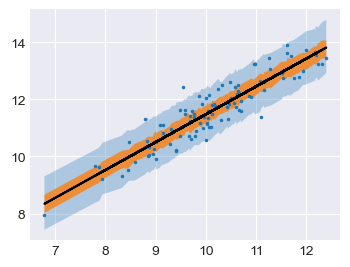

In [11]:
# 別の書き方
plt.figure(figsize=(4,3))
plt.plot(x, y, "C0.", markersize=3)
plt.plot(x, alpha_m + beta_m * x, 
         c="k", 
         label=f"y = {alpha_m:.2f} + {beta_m:.2f} * x"
         )
idx = np.argsort(x)
x_ord = x[idx]
# sig = pm.stats.hpd(trace.posterior["mu"], alpha=0.02)[idx]
# sig = pm.hpd(trace["mu"], alpha=0.02)[idx]
# sig = az.hdi(x, trace['mu'], hdi_prob=0.98, color='k')
# sig = az.hdi(x, var_names="mu", hdi_prob=0.98)
# plt.fill_between(x, sig[:,0], sig[:,1], color="gray")
# plt.xlabel("$x$", fontsize=14)
# plt.ylabel("$y$", fontsize=14, rotation=0)
# plt.savefig("img409.png")
ci_95 = az.hdi(ppc['y_pred'], hdi_prob=0.95)[idx]
ci_50 = az.hdi(ppc['y_pred'], hdi_prob=0.50)[idx]
# az.plot_hpd(x, trace['mu'], credible_interval=0.98, color='k')
plt.fill_between(x_ord, 
                 ci_95[:,0], ci_95[:,1],
                 alpha=0.3, 
                 label='95%HPD')
plt.fill_between(x_ord, 
                 ci_50[:,0], ci_50[:,1],
                 alpha=0.8, 
                 label='95%HPD')
# print(f"{type(sig)=}")
# print(f"{sig=}")

In [12]:
ppc = pm.sample_posterior_predictive(trace, samples=2000, model=model)

/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


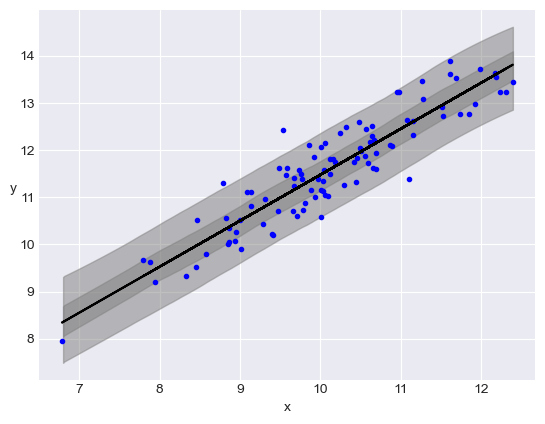

In [13]:
plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

az.plot_hdi(x, ppc['y_pred'], hdi_prob=0.5, color='gray')
az.plot_hdi(x, ppc['y_pred'], color='gray')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.savefig('img410.png', dpi=300)

In [14]:
az.r2_score(y, ppc['y_pred'])

r2        0.75
r2_std    0.03
dtype: float64

## 4.3 階層線形回帰
- ここのグループレベルでの推定、グループ全体レベルでの推定
- いくつかのグループを同時にモデル化できる
- ハイパー事前分布を導入する

1. まず階層化してないモデル＝非階層モデルでやってみる：うまくいかない -> **一点データに直線をフィットさせようとしてるから**
1. 階層化してみる：驚き！
    * 階層化することで、グループ間に情報共有がなされる。

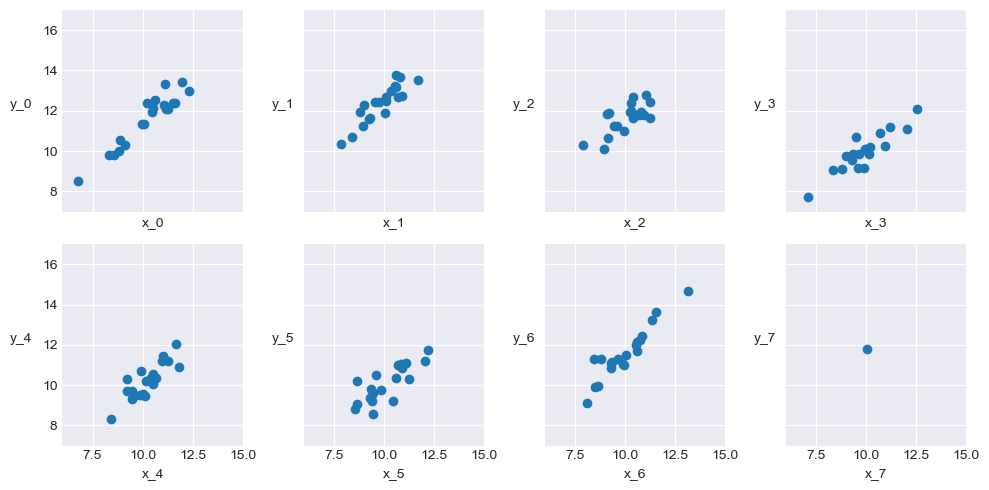

In [15]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)
np.random.seed(314)

alpha_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(6, 1, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))

y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real

_, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True)
ax = np.ravel(ax)
j, k = 0, N
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', rotation=0, labelpad=15)
    ax[i].set_xlim(6, 15)
    ax[i].set_ylim(7, 17)
    j += N
    k += N
plt.tight_layout()
plt.savefig('B11197_03_13.png', dpi=300)

In [16]:
#　中心化
x_centered = x_m - x_m.mean()

In [17]:
# まず、非階層モデルにフィットさせてみる
with pm.Model() as unpooled_model:
    alpha_tmp = pm.Normal("alpha_tmp", mu=0, sigma=10, shape=M)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=M)
    epsilon = pm.HalfCauchy("epsilon", 5)
    nu = pm.Exponential("nu", 1/30)
    y_pred = pm.StudentT("y_pred", 
                         mu=alpha_tmp[idx]+beta[idx]*x_centered,
                         sigma=epsilon,
                         nu=nu,
                         observed=y_m,
                         )
    alpha = pm.Deterministic("alpha", alpha_tmp-beta*x_m.mean())

    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_up = pm.sample(draws=2000, 
                         step=step, 
                         initvals=start,   # <- startではなく、initvalsが正しいらしい.. warningによると。
                         return_inferencedata=True,
                         cores=2)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, epsilon, beta, alpha_tmp]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 6 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


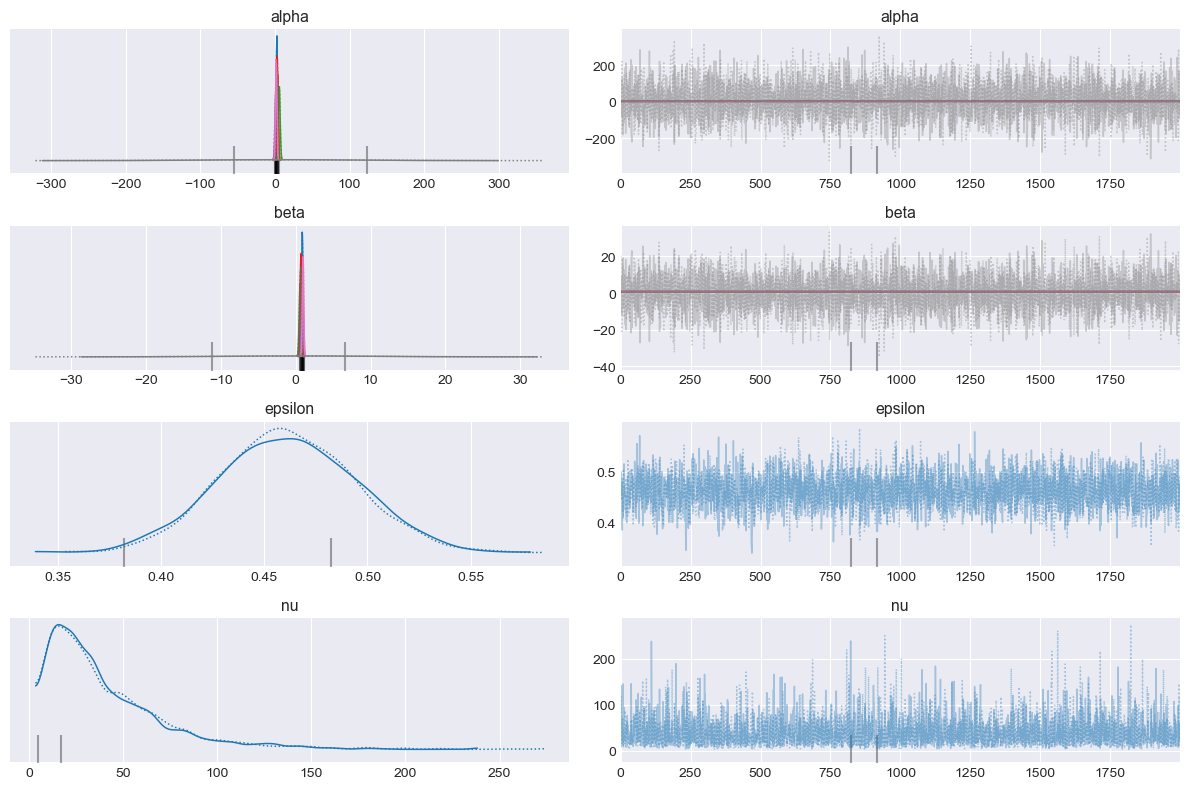

In [18]:
varnames = ["alpha", "beta", "epsilon", "nu"]
az.plot_trace(trace_up, varnames)
plt.tight_layout()
plt.savefig("img418.png")

In [19]:
# 階層モデルで再構築
with pm.Model() as hierarchical_model:
    # hyper-priors
    alpha_tmp_mu = pm.Normal("alpha_tmp_mu", mu=0, sigma=10)
    alpha_tmp_sd = pm.HalfNormal("alpha_tmp_sd", sigma=10)
    beta_mu = pm.Normal("beta_mu", mu=10, sigma=10)
    beta_sd = pm.HalfNormal("beta_sd", sigma=10)

    # priors
    alpha_tmp = pm.Normal("alpha_tmp", 
                          mu=alpha_tmp_mu, 
                          sigma=alpha_tmp_sd,
                          shape=M)
    beta = pm.Normal("beta", mu=beta_mu, sigma=beta_sd, shape=M)
    epsilon = pm.HalfCauchy("epsilon", 5)
    nu = pm.Exponential("nu", 1/30)

    y_pred = pm.StudentT("y_pred", mu=alpha_tmp[idx] + beta[idx] * x_centered,
                         sigma=epsilon,
                         nu=nu,
                         observed=y_m)

    alpha = pm.Deterministic("alpha", alpha_tmp - beta * x_m.mean())
    alpha_mu = pm.Deterministic("alpha_mu", alpha_tmp_mu - beta_mu * x_m.mean())
    alpha_sd = pm.Deterministic("alpha_sd", alpha_tmp_sd - beta_mu * x_m.mean())

    trace_hm = pm.sample(draws=2000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, epsilon, beta, alpha_tmp, beta_sd, beta_mu, alpha_tmp_sd, alpha_tmp_mu]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodul

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 10 seconds.
There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
There were 54 divergences after tuning. Increase `target_accept` or reparameterize.
There were 78 divergences after tuning. Increase `target_accept` or reparameterize.
There were 75 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


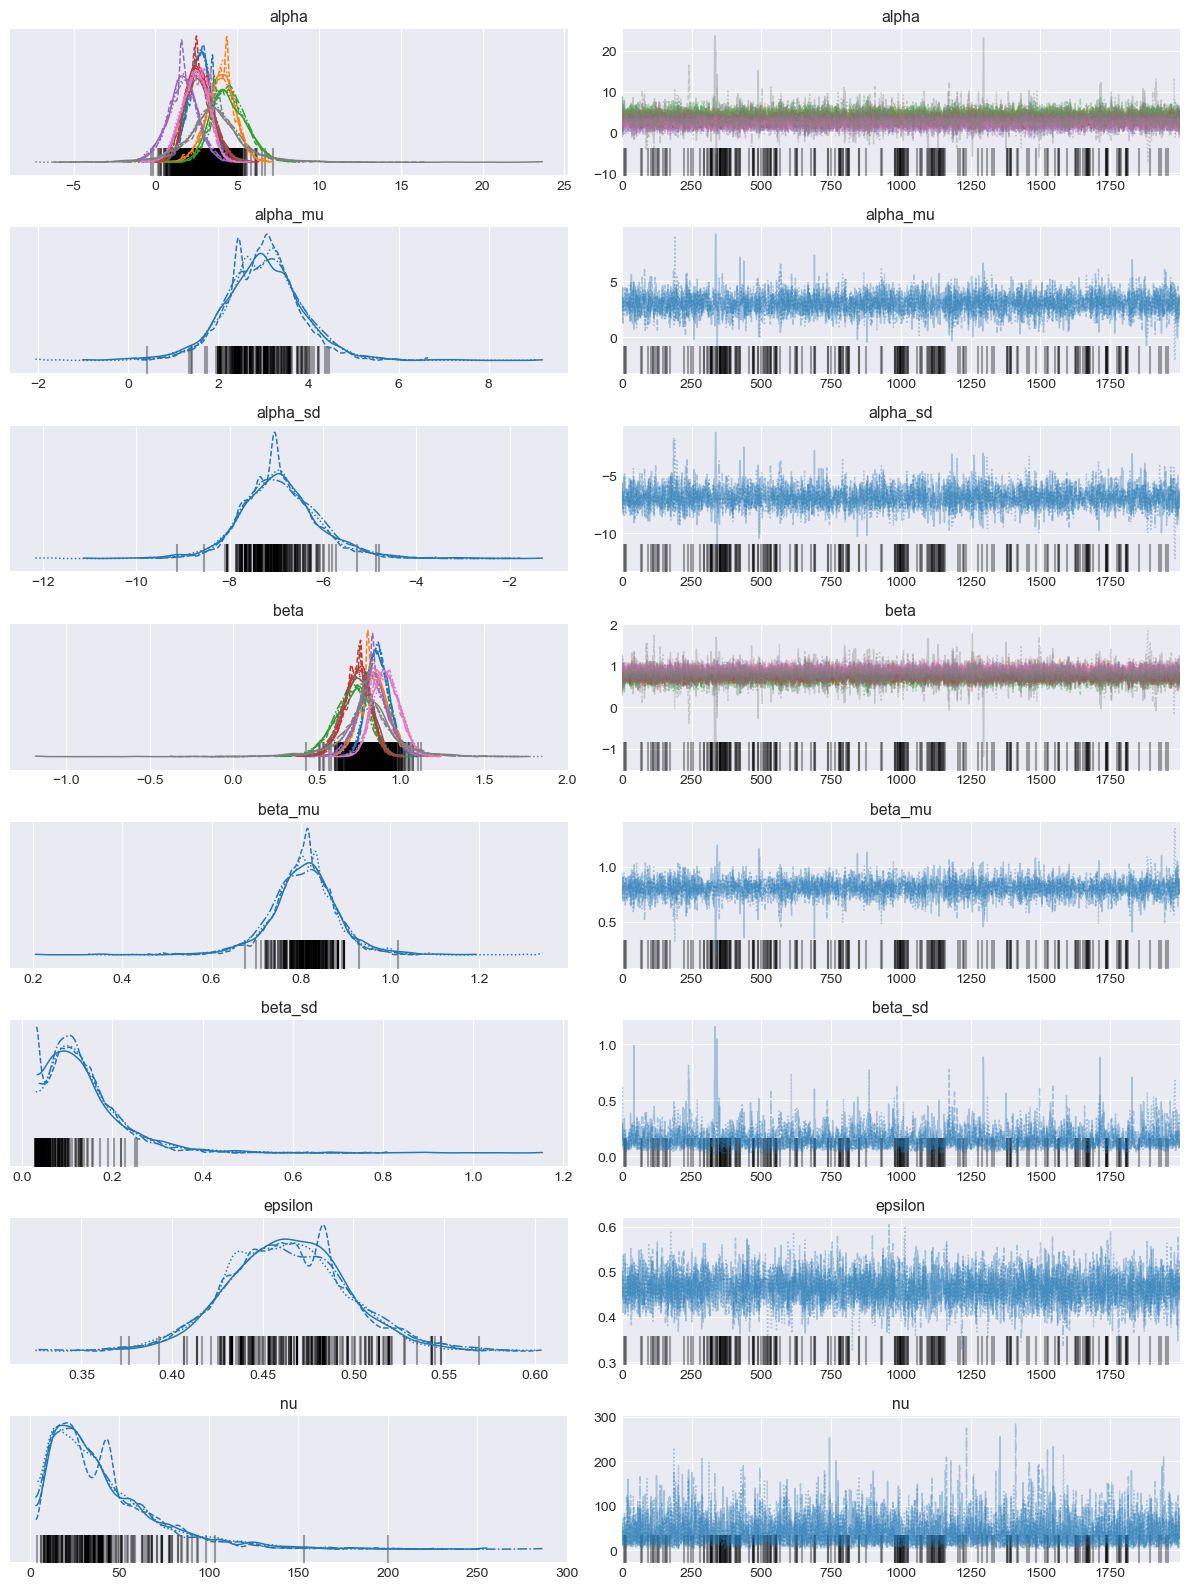

In [20]:
varnames = ["alpha", "alpha_mu", "alpha_sd", "beta", "beta_mu", "beta_sd", "epsilon", "nu"]
az.plot_trace(trace_hm, varnames)
plt.tight_layout()
plt.savefig("img420.png")

In [21]:
print(f"{x_m.min()=}")
print(f"{x_m.max()=}")
print(f"{N=}")

x_m.min()=6.786377512713057
x_m.max()=13.130642198220317
N=20


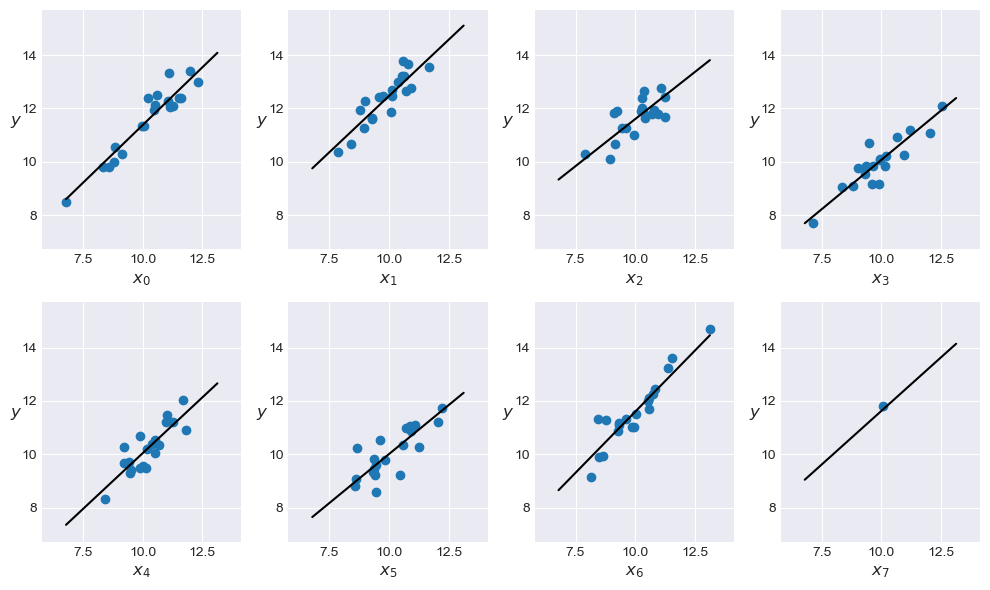

In [22]:
plt.figure(figsize=(10, 6))
j, k = 0, N
x_range = np.linspace(x_m.min(), x_m.max(), 10)
for i in range(M):
    plt.subplot(2,4,i+1)
    plt.scatter(x_m[j:k], y_m[j:k])
    plt.xlabel(f"$x_{i}$", fontsize=12)
    plt.ylabel(f"$y$", fontsize=12, rotation=0)
    alpha_m = trace_hm["alpha"][:,i].mean()
    beta_m = trace_hm["beta"][:,i].mean()
    plt.plot(x_range, alpha_m + beta_m * x_range,
             c="k", 
             label=f"y = {alpha_m:.2f} + {beta_m:.2f} * x")
    plt.xlim(x_m.min()-1, x_m.max()+1)
    plt.ylim(y_m.min()-1, y_m.max()+1)
    j += N
    k += N
plt.tight_layout()
plt.savefig("img421png")


## 4.4 多項式回帰

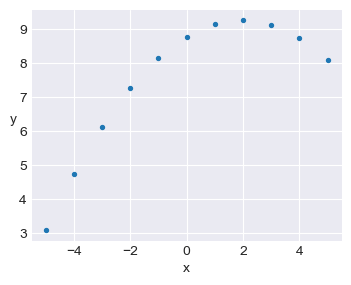

In [23]:
ans = sns.load_dataset("anscombe")
x_2 = ans[ans.dataset == 'II']['x'].values
y_2 = ans[ans.dataset == 'II']['y'].values
x_2 = x_2 - x_2.mean()
# y_2 = y_2 - y_2.mean()

plt.figure(figsize=(4,3))
plt.scatter(x_2, y_2, s=8)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.savefig("img422.png")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, beta2, beta1, alpha]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 5 seconds.
The acceptance probability does not match the target. It is 0.8819172479946027, but should be close to 0.8. Try to increase the number of tuning steps.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


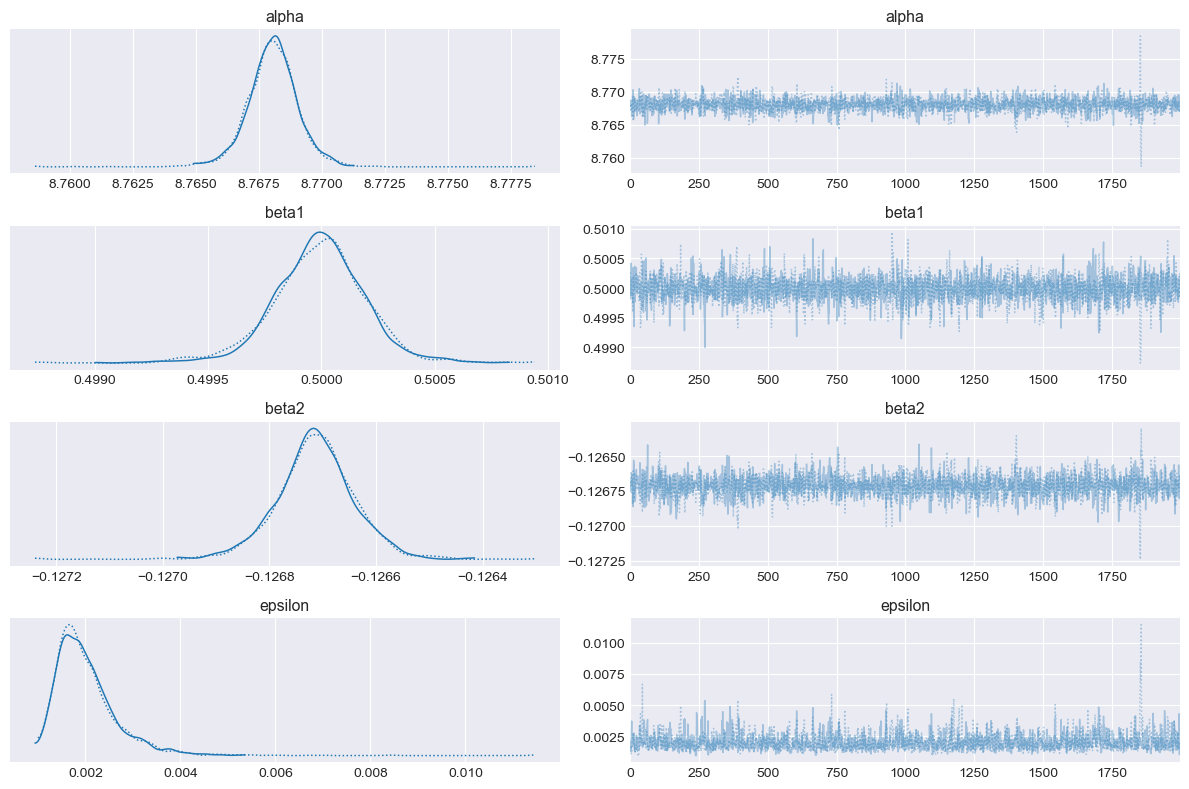

In [24]:
with pm.Model() as model_poly:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta1 = pm.Normal("beta1", mu=0, sigma=10)
    beta2 = pm.Normal("beta2", mu=0, sigma=10)
    epsilon = pm.HalfNormal("epsilon", 5)

    mu = alpha + beta1 * x_2 + beta2 * x_2**2

    y_pred = pm.Normal("y_pred", mu=mu, sigma=epsilon, observed=y_2)

    trace_poly = pm.sample(draws=2000, cores=2, return_inferencedata=False)

az.plot_trace(trace_poly)
plt.tight_layout()
plt.savefig("img423.png")

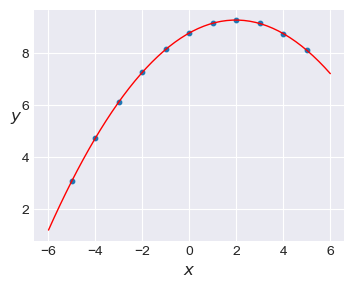

In [25]:
x_p = np.linspace(-6, 6)
y_p = trace_poly["alpha"].mean() + trace_poly["beta1"].mean() * x_p + trace_poly["beta2"].mean() * x_p**2

plt.figure(figsize=(4,3))
plt.scatter(x_2, y_2, s=10)
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12, rotation=0)
plt.plot(x_p, y_p, c="r", lw=1)
plt.savefig("img424.png")

## 4.5 線形重回帰
$\mu = \alpha + \bm{\beta}\bm{X}$   
に従う表現で、変数間の相関の有無を疑いながら２次元の多項式回帰を見る。

In [26]:
np.random.seed(314)
N = 100
alpha_real = 2.5
beta_real = [0.9, 1.5]
eps_real = np.random.normal(0, 0.5, size=N)

X = np.array([np.random.normal(i,j,N) for i,j in zip([10, 2], [1, 1.5])])
X_mean = X.mean(axis=1, keepdims=False)
print(f"keepdims = False: {X_mean.shape=}")
X_mean = X.mean(axis=1, keepdims=True)
print(f"keepdims =  True: {X_mean.shape=}")
X_centered = X - X_mean
y = alpha_real + np.dot(beta_real, X) + eps_real


print(f"{X.shape = }")
print(f"{X[0,:].mean()=}, {X[0,:].std()=}")
print(f"{X[1,:].mean()=}, {X[1,:].std()=}")
# print(f"{x.shape = }")
print(f"{X_centered.shape = }")
print(f"{y.shape = }")

keepdims = False: X_mean.shape=(2,)
keepdims =  True: X_mean.shape=(2, 1)
X.shape = (2, 100)
X[0,:].mean()=10.129192299164298, X[0,:].std()=1.0895617838070337
X[1,:].mean()=1.9951990224635177, X[1,:].std()=1.4769449039869662
X_centered.shape = (2, 100)
y.shape = (100,)


In [27]:
def scatter_plot(x, y):
    plt.figure(figsize=(5, 5))
    for idx, x_i in enumerate(x):
        plt.subplot(2, 2, idx+1)
        plt.scatter(x_i, y, s=5)
        plt.xlabel(f"$x_{idx+1}$", fontsize=14)
        plt.ylabel(f"$y$", fontsize=14, rotation=0)
    plt.subplot(2, 2, idx+2)
    plt.scatter(x[0], x[1], s=5)
    plt.xlabel(f"$x_{idx}$", fontsize=14)
    plt.ylabel(f"$x_{idx+1}$", fontsize=14, rotation=0)
    plt.tight_layout()

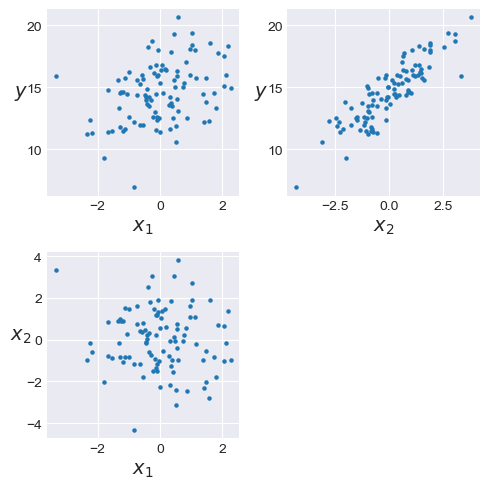

In [28]:
scatter_plot(X_centered, y)
plt.savefig("img425.png")

/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, beta, alpha_tmp]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (t

Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 5 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[0],1.86,0.45,0.98,2.69,4.00e-03,3.00e-03,14009.0,8542.0,1.0
beta[0],0.97,0.04,0.89,1.05,0.00e+00,0.00e+00,14003.0,8163.0,1.0
beta[1],1.47,0.03,1.41,1.53,0.00e+00,0.00e+00,13536.0,8047.0,1.0
epsilon,0.47,0.04,0.41,0.54,0.00e+00,0.00e+00,13667.0,7164.0,1.0


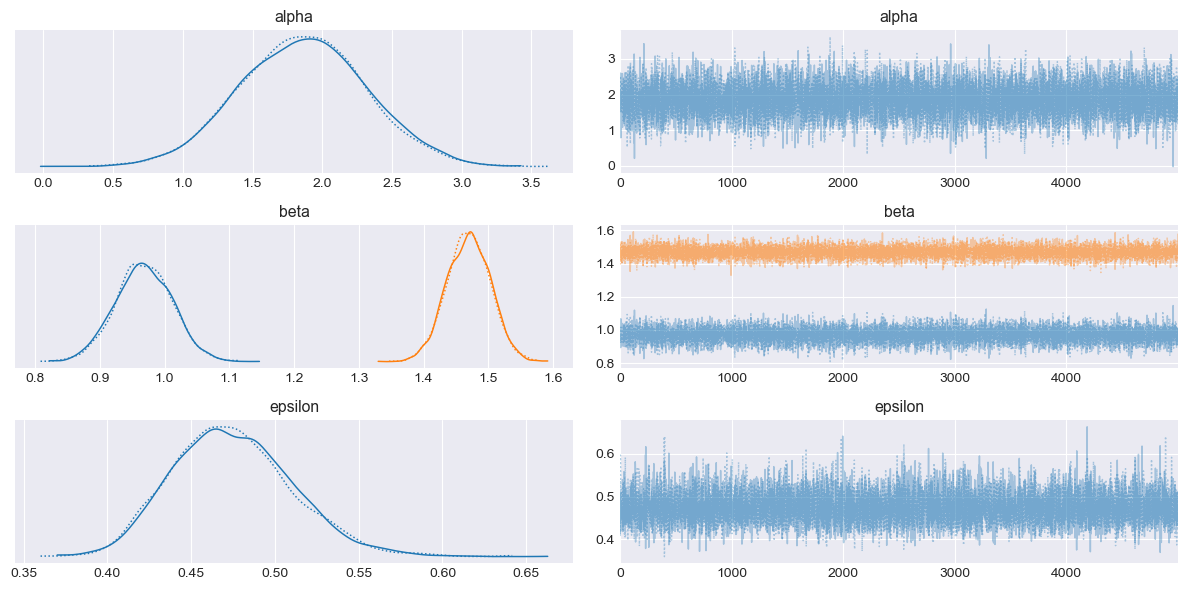

In [29]:
# モデル構築
with pm.Model() as model_mlr:
    alpha_tmp = pm.Normal("alpha_tmp", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=1, shape=2)   # shape=2 が重要
    epsilon = pm.HalfCauchy("epsilon", 5)
    mu = alpha_tmp + pm.math.dot(beta, X_centered)
    
    alpha = pm.Deterministic("alpha", alpha_tmp - pm.math.dot(beta, X_mean))
    y_pred = pm.Normal("y_pred", mu=mu, sigma=epsilon, observed=y)

    trace_mlr = pm.sample(draws=5000, cores=2)

varnames = ["alpha", "beta", "epsilon"]
az.plot_trace(trace_mlr, varnames)
plt.tight_layout()
plt.savefig("img426.png")

az.summary(trace_mlr, varnames)

↑ `pm.summary(trace_mlr)`を見ればわかるように、事前に設定したパラメータに対して想定の範囲内の真値が再現されていることがわかる。

### 交絡変数の問題を調べる

In [30]:
# 交絡変数をもつ線形重回帰モデルの変数間散布図
np.random.seed(314)
N = 100
x_1 = np.random.normal(size=N)
x_2 = x_1 + np.random.normal(size=N, scale=1)
y = x_1 + np.random.normal(size=N)
X = np.vstack((x_1, x_2))

print(f"{X.shape = }")
print(f"{X[0,:].mean()=}, {X[0,:].std()=}")
print(f"{X[1,:].mean()=}, {X[1,:].std()=}")
print(f"{y.shape = }")

X.shape = (2, 100)
X[0,:].mean()=-0.024290543811315842, X[0,:].std()=0.9396883594273587
X[1,:].mean()=0.10490175535298285, X[1,:].std()=1.5555595305197192
y.shape = (100,)


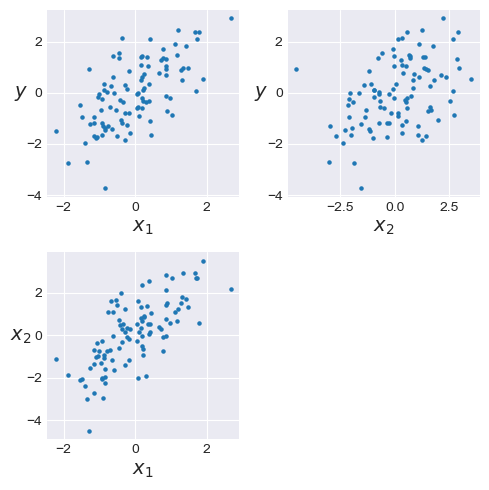

In [31]:
scatter_plot(X, y)
plt.savefig("img427.png")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, beta, alpha]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 5 seconds.


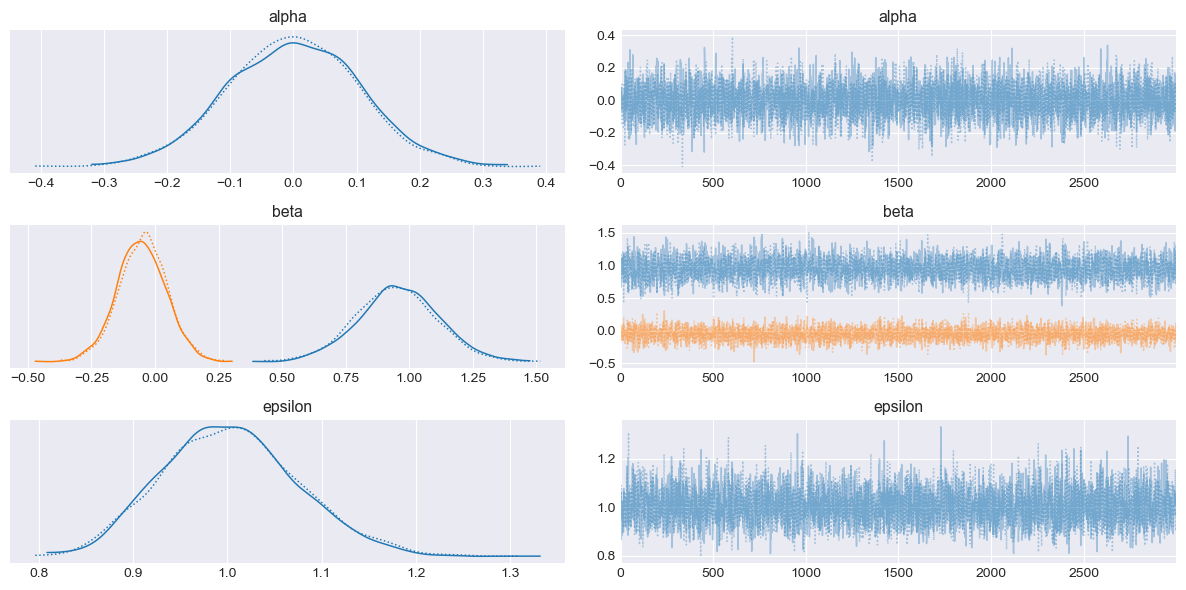

In [32]:
# 交絡変数をもつ線形重回帰モデルのパラメータのKDEとトレースを出力
with pm.Model() as model_red:
    alpha = pm.Normal("alpha", mu=0, sigma=1)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    epsilon = pm.HalfCauchy("epsilon", 3)

    mu = alpha + pm.math.dot(beta, X)
    y_pred = pm.Normal("y_pred", mu=mu, sigma=epsilon, observed=y)

    trace_red = pm.sample(draws=3000, cores=2, return_inferencedata=True)


az.plot_trace(trace_red)
plt.tight_layout()
    

In [33]:
az.summary(trace_red)  # return_inferencedata=True にしておくと、future warningが出ない


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.00,0.10,-0.20,0.20,1.00e-03,1.00e-03,5241.0,3654.0,1.0
beta[0],0.95,0.16,0.64,1.23,3.00e-03,2.00e-03,3301.0,3514.0,1.0
beta[1],-0.05,0.10,-0.22,0.14,2.00e-03,1.00e-03,3354.0,3505.0,1.0
epsilon,1.00,0.07,0.87,1.14,1.00e-03,1.00e-03,4802.0,4191.0,1.0


↑ beta[1]（: $\beta_2$に対応）はだいぶ0に近い。つまり、`x_2`がyにほとんど貢献してない。
問題設定した時に、`x_1`が重要変数であることはわかっているのでこれは大変興味深い。

さらに理解深めるため、以下の２ケースをみる。**ベータ係数の平均値はどうなるか？？**
1. `x_1`, `x_2`両方をモデルに入れて、再実行
1. `x_1`のみモデルに入れて、再実行
1. `x_2`のみモデルに入れて、再実行

In [34]:
print(f"{y.shape=}")
print(f"{X.shape=}")


y.shape=(100,)
X.shape=(2, 100)


In [35]:
with pm.Model() as model_x1x2:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta1 = pm.Normal("beta1", mu=0, sigma=10)
    beta2 = pm.Normal("beta2", mu=0, sigma=10)
    epsilon = pm.HalfCauchy("epsilon", 5)

    mu = alpha + beta1 * X[0, :] + beta2 * X[1, :]

    y_pred = pm.Normal("y_pred", mu=mu, sigma=epsilon, observed=y)

    trace_x1x2 = pm.sample(3000, return_inferencedata=False, chains=2)


with pm.Model() as model_x1:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta1 = pm.Normal("beta1", mu=0, sigma=10)
    epsilon = pm.HalfCauchy("epsilon", 5)

    mu = alpha + beta1 * X[0, :]
    # mu = alpha + pm.math.dot(beta1, X[:, 0])

    y_pred = pm.Normal("y_pred", mu=mu, sigma=epsilon, observed=y)

    trace_x1 = pm.sample(3000, return_inferencedata=False, chains=2)


with pm.Model() as model_x2:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta2 = pm.Normal("beta2", mu=0, sigma=10)
    epsilon = pm.HalfCauchy("epsilon", 5)

    mu = alpha + beta2 * X[1, :]

    y_pred = pm.Normal("y_pred", mu=mu, sigma=epsilon, observed=y)

    trace_x2 = pm.sample(3000, return_inferencedata=False, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [epsilon, beta2, beta1, alpha]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 5 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [epsilon, beta1, alpha]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 4 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [epsilon, beta2, alpha]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 4 seconds.


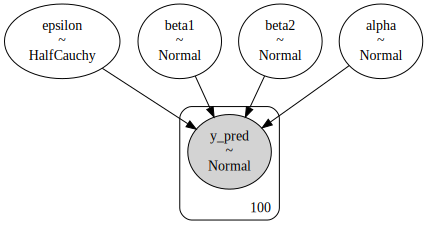

In [36]:
pm.model_to_graphviz(model_x1x2)

In [37]:
# az.plot_trace(trace_x1x2)
# plt.tight_layout()
# az.plot_trace(trace_x1)
# plt.tight_layout()
# az.plot_trace(trace_x2)
# plt.tight_layout()
# plt.show()

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


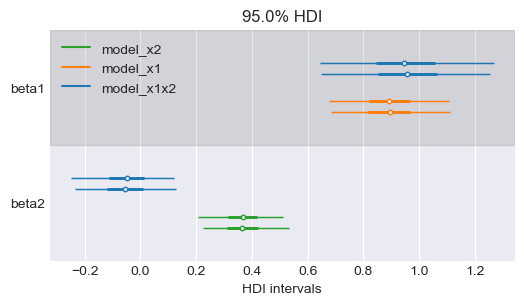

In [38]:
axes = az.plot_forest(data=[trace_x1x2, trace_x1, trace_x2],
                      model_names=["model_x1x2", "model_x1", "model_x2"],
                      var_names=["beta1", "beta2"],
                      combined=False,
                      hdi_prob=0.95, 
                      colors="cycle",
                      figsize=(6,3),
                      textsize=10,
                      )
axes[0].set_xlabel("HDI intervals")
axes[0].set_title("95.0% HDI")
plt.show()

上のHDIを通じて
- `beta1`は線形単回帰の場合よりも線形重回帰の方が値が**大きい**（本では「小さい」と言ってるがミスプリ？）
- `y`に対する`x_2`の説明力(`beta2`)は、モデルに`x_1`が組み込まれると小さくなる

### 4.5.2 多重共線性あるいは相関が高い場合
- 既に作成した疑似的データ作成コードで、`x_2`を変更する。
- ベータ係数のKDEを見て、相関がありそうであることを確認する。（相関がありそうなのは当然だが）



In [39]:
np.random.seed(314)
N = 100
x_1 = np.random.normal(size=N)
# x_2 = x_1 + np.random.normal(size=N, scale=1)
x_2 = x_1 + np.random.normal(size=N, scale=0.01)
y = x_1 + np.random.normal(size=N)
X = np.vstack((x_1, x_2))

print(f"{X.shape=}")
print(f"{y.shape=}")

X.shape=(2, 100)
y.shape=(100,)


/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


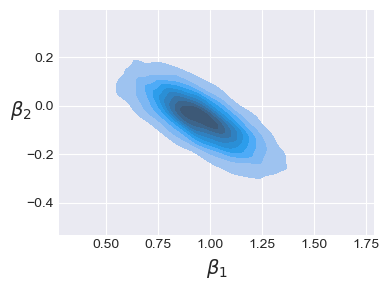

<AxesSubplot: xlabel='beta\n0', ylabel='beta\n1'>

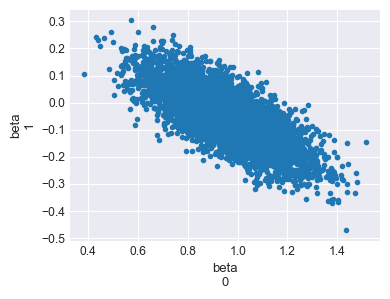

In [40]:
plt.figure(figsize=(4,3))
sns.kdeplot(x=trace_x1x2["beta1"], 
            y=trace_x1x2["beta2"],
            linewidth=1,
            fill=True,
            )
plt.xlabel(r"$\beta_1$", fontsize=14)
plt.ylabel(r"$\beta_2$", fontsize=14, rotation=0)
plt.tight_layout()
plt.show()

# これでもokみたい
az.plot_pair(trace_red, var_names=['beta'], figsize=(4,3))

array([<AxesSubplot: title={'center': '94.0% HDI'}>], dtype=object)

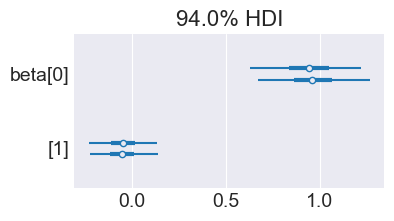

In [41]:
# 独立変数間の相関が高い場合、ベータ係数のHPDは事前分布が許容する限り幅が広くなる
# なんか思ったより広がらない．．．?
az.plot_forest(trace_red, 
               var_names=["beta"], 
               combined=False, 
               figsize=(4, 2))
